<a href="https://colab.research.google.com/github/saddam-satria/linear_regression/blob/master/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
from sklearn.datasets import load_boston

In [143]:
import pandas as pd
import numpy as np
dataset= load_boston()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [144]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [145]:
df["crim1"] = df.iloc[:,0]-df.iloc[:,0].mean()/df.iloc[:,0].std()
df.head()
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crim3 = np.array(df['CRIM'].values)
crim3 = crim3[:,np.newaxis]
crim3 = scaler.fit_transform(crim3)
df['crim2'] = crim3

In [146]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,crim1,crim2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.413782,-0.419782
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.392792,-0.417339
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.392812,-0.417342
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-0.387732,-0.416750
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-0.351052,-0.412482


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin=LinearRegression ()
x = df['RM']
x = x[:,np.newaxis]
y = df['target']
lin.fit(x,y)
y_pred = lin.predict(x)
print(lin.coef_)
print(lin.intercept_)
print(lin.score(x,y))
print(mean_squared_error(y,y_pred))

[9.10210898]
-34.67062077643857
0.4835254559913343
43.60055177116956


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


Text(0, 0.5, 'price')

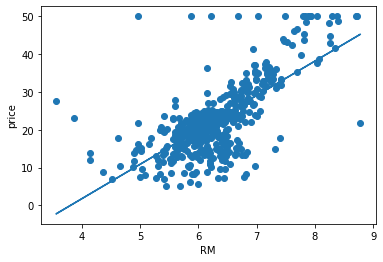

In [148]:
import matplotlib.pyplot as plt
plt.scatter (df['RM'],df['target'])
plt.plot(x,y_pred)
plt.xlabel('RM')
plt.ylabel('price')

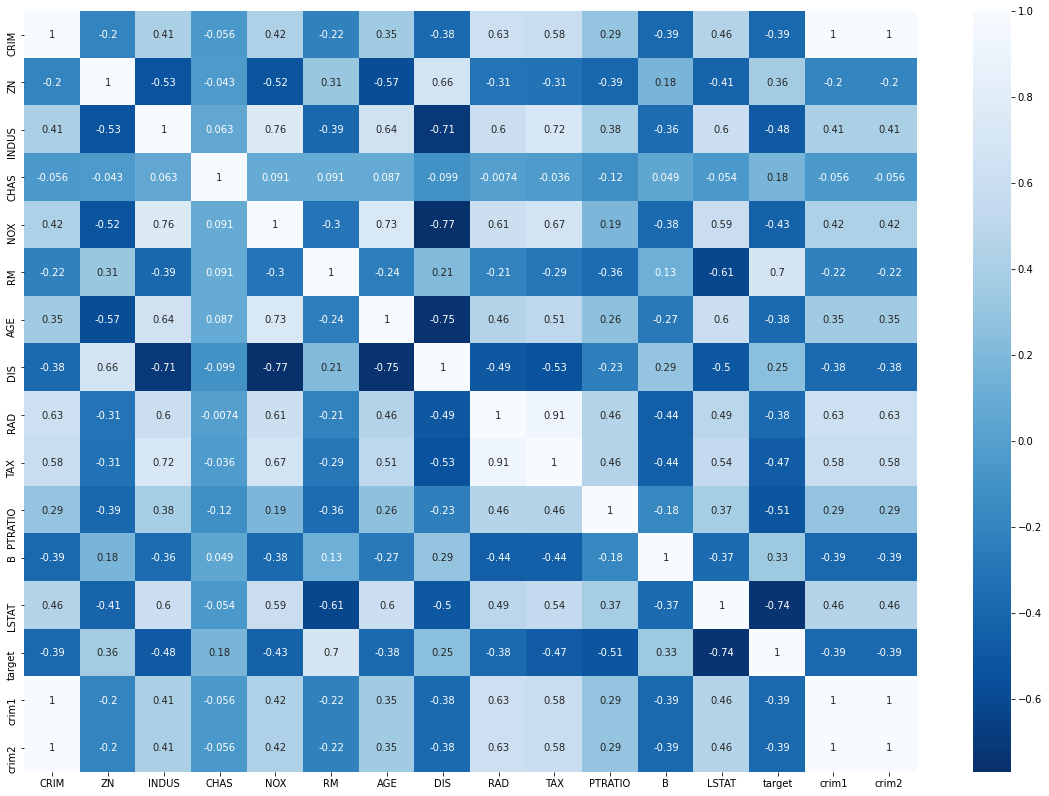

In [149]:
import seaborn as sn
#sn.pairplot(df, kind=("kde"),vars=df[["RM","CRIM","TAX","AGE","target"]],height=2.5)
plt.subplots(figsize=(20,14))
sn.heatmap(df.corr(),annot=True,cmap='Blues_r')

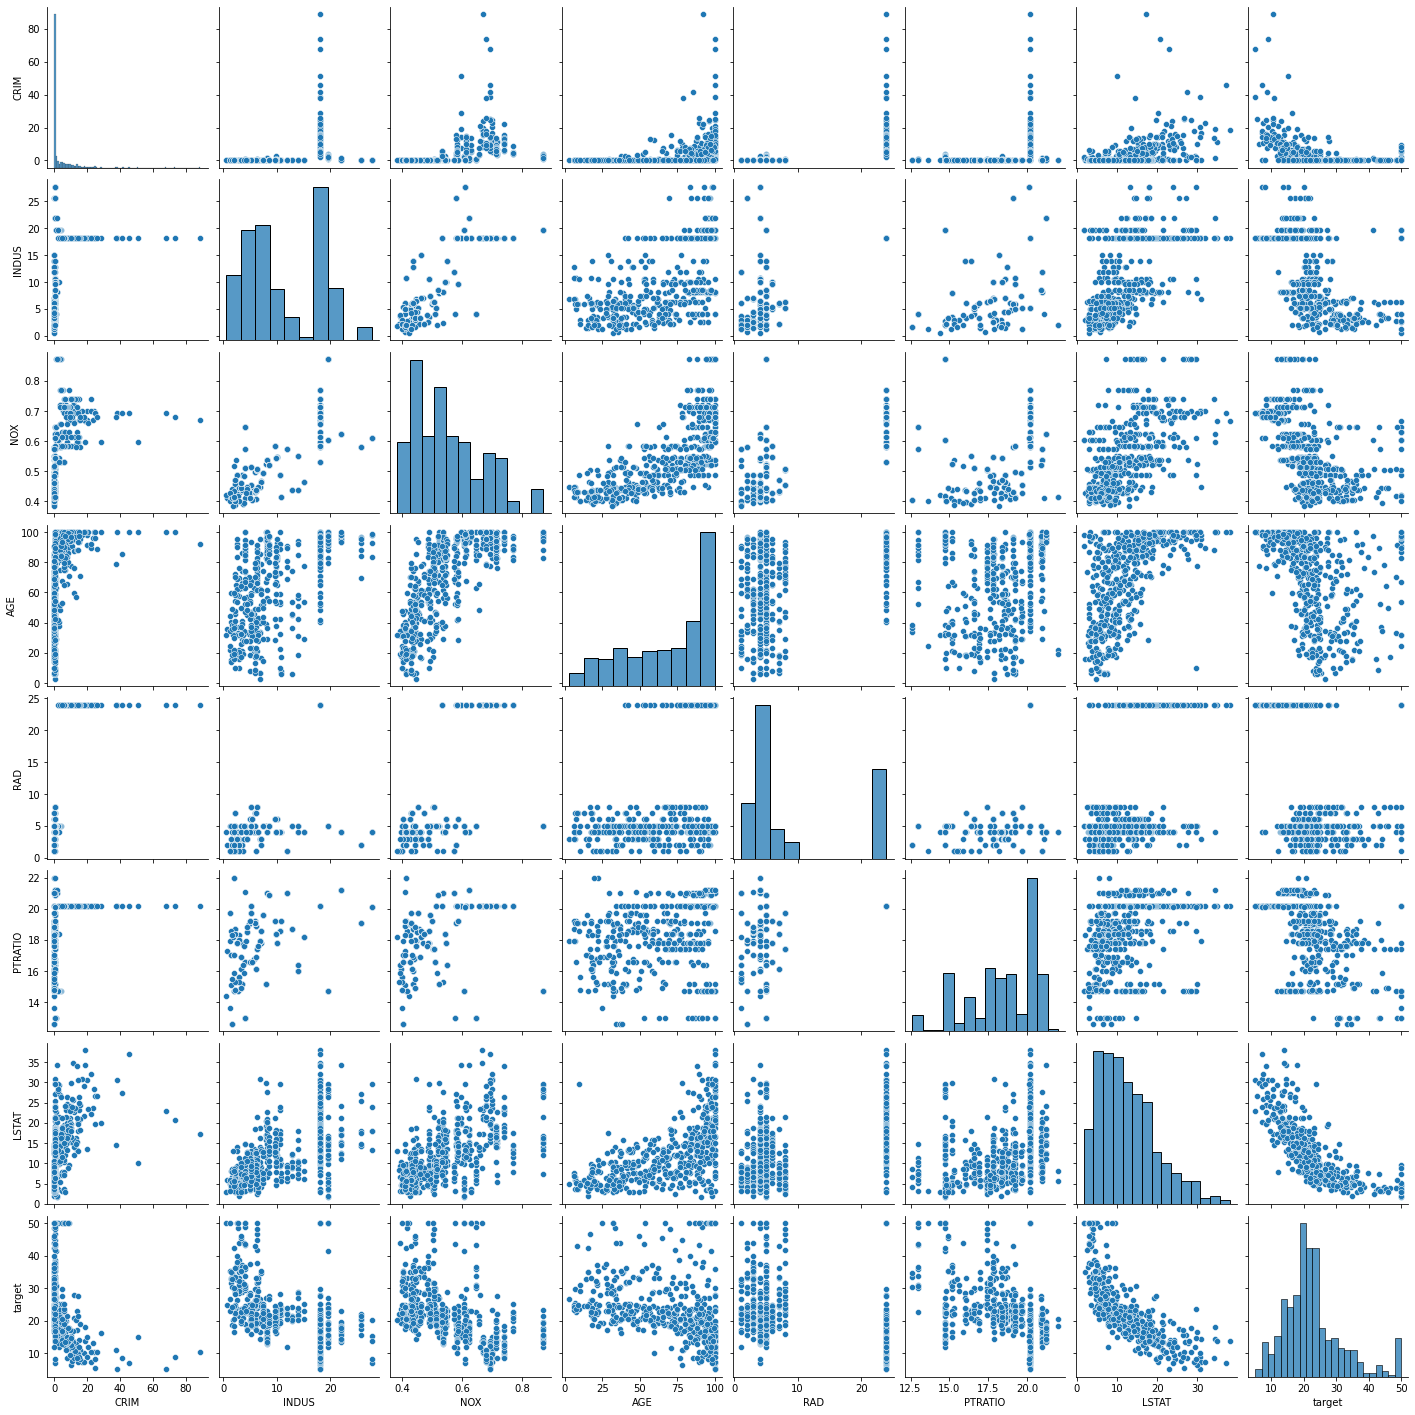

In [150]:
sn.pairplot(df, kind=("scatter"),vars=df[["CRIM","INDUS","NOX","AGE","RAD","PTRATIO","LSTAT","target"]],height=2.5)

In [151]:
 
x1 = df[["RM","CRIM","TAX","LSTAT"]]
y1 = df["target"]
 
from sklearn.model_selection import train_test_split
 
xTr,xTs,yTr,yTs = train_test_split(x1,y1,test_size=0.25)
 
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
xTr = scaler2.fit_transform(xTr)
xTs = scaler2.fit_transform(xTs)

In [154]:
lin2 = LinearRegression ()
lin2.fit(xTr,yTr)
y_pred2 = lin2.predict(xTs)
y_pred2 = y_pred2[:,np.newaxis]

In [159]:
df2 = pd.DataFrame(yTs)
df2['prediksi'] = y_pred2

In [160]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lin2,xTr,yTr)
print(cvs.mean())
valid = lin2.predict(xTs)
valid = valid[:,np.newaxis]
df2["valid"] = valid
df2.head()

0.5931768043683192


,target,prediksi,valid
47,16.6,18.828177,18.828177
209,20.0,12.544381,12.544381
183,32.5,29.026661,29.026661
277,33.1,31.005948,31.005948
229,31.5,29.448942,29.448942


score: 0.7780869740271762
mse: 19.215846130782953
coef: [ 3.53941678 -0.59653606 -0.78146597 -3.65370517]
intercept: 22.594459102902377


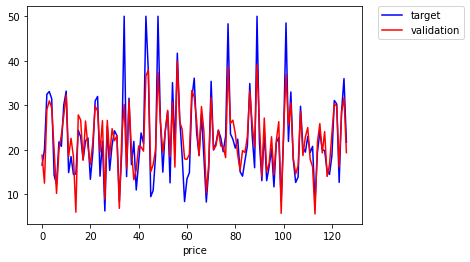

In [158]:
 
print("score:",lin2.score(xTs,yTs))
print ("mse:", mean_squared_error(yTs,y_pred2))
print ("coef:", lin2.coef_)
print("intercept:",lin2.intercept_)
s = []
for i in range(len(df2.target)):
     s.append(i)
plt.plot(s,df2['target'],color="blue",label="target")
#plt.plot(df2['prediksi'],df2['prediksi'],color="blue",label="prediksi")
plt.plot(s,df2['valid'],color ='red',label="validation")
plt.xlabel("price")
#Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)